In [39]:
# Modules
# Run this every first each time you reset the kernel.
import matplotlib.pyplot as plt
import numpy
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from pylab import *


from PIL import Image
import requests
from io import BytesIO

<class 'numpy.ndarray'>


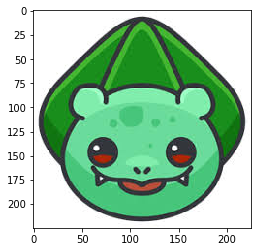

In [35]:
# Read the image
# use jpg name "1-10".jpg
#1.jpg
#2.jpg
#3.jpg
img = imread('data/images/2.jpg')
imshow(img)
print(type(img))

<class 'numpy.ndarray'>


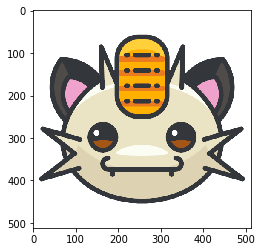

In [40]:

url="https://icons-for-free.com/iconfiles/png/512/go+meowth+play+pokemon+icon-1320186976860848555.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = numpy.array(img)
imshow(img)
print(type(img))

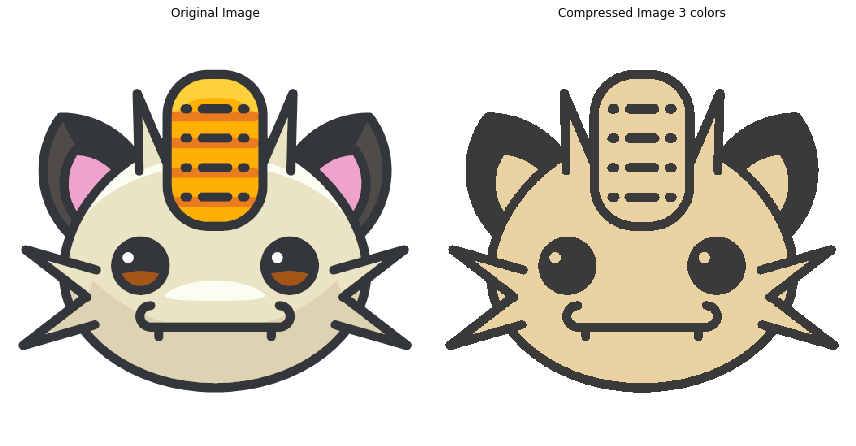

In [44]:

img_size = img.shape
# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

# Run the Kmeans algorithm
k = 3
km = KMeans(n_clusters=k, verbose=0)
km.fit(X)

# Use the centroids to compress the image
X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image ' + str(k) + ' colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();